## Algorithms

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
import time

### Time Complexity (Big O Notation):

This is the most common way to express algorithm difficulty. It describes how the runtime of an algorithm scales with the input size. Big O notation focuses on the dominant term and ignores constant factors.

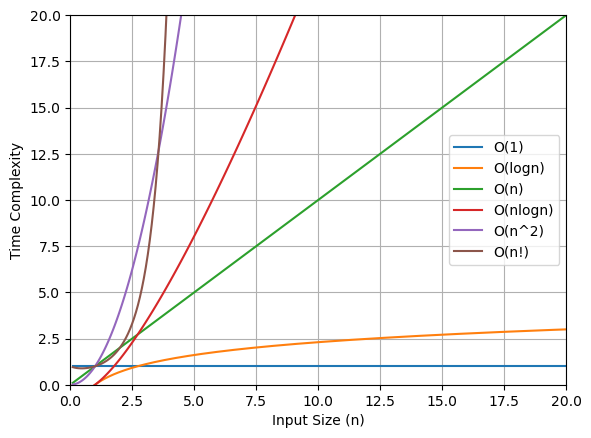

In [21]:
# O(1) plot
x = np.linspace(0.1, 50, 1000)
y = [1] * 1000
plt.plot(x, y)

# O(logn) plot
x_log = np.linspace(0.1, 50, 1000)
y_log = np.log(x_log)
plt.plot(x_log, y_log)

# O(n) plot
x = np.linspace(0.1, 25, 100)
y = x
plt.plot(x, y)

# O(nlogn) plot
x_log = np.linspace(0.1, 10, 100)
y_log = x_log * np.log(x_log)
plt.plot(x_log, y_log)

# O(n^2) plot
x = np.linspace(0.1, 5, 100)
y = x**2
plt.plot(x, y)

# O(n!) plot
x = np.linspace(0.1, 4, 50)
y = scipy.special.factorial(x)
plt.plot(x, y)

plt.xlabel('Input Size (n)')
plt.ylabel('Time Complexity')
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.legend(['O(1)', 'O(logn)','O(n)', 'O(nlogn)', 'O(n^2)', 'O(n!)'])
plt.grid(True)
plt.show()

## Function for calculating time complexity

In [13]:
def measure_time(func, *args, runs=10):  # Measure multiple runs for accuracy
    total_time = 0
    for _ in range(runs):
        start_time = time.perf_counter()
        func(*args)
        end_time = time.perf_counter()
        total_time += end_time - start_time
    return total_time / runs  # Average time

# Example: Linear search (O(n))
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

# Example: Binary search (O(log n))
def binary_search(arr, target):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

arr_size = 1000000
arr = list(range(arr_size))
target = arr_size // 2

linear_time = measure_time(linear_search, arr, target)
binary_time = measure_time(binary_search, arr, target)

print(f"Linear search time: {linear_time}")
print(f"Binary search time: {binary_time}")

# Compare how the times change with larger arr_size.  That will illustrate the Big O.

Linear search time: 0.01525557999848388
Binary search time: 2.5600020308047533e-06


n = 10, time = 5.999987479299307e-07
n = 100, time = 1.5599973266944289e-06
n = 1000, time = 1.56299996888265e-05
n = 10000, time = 0.00016371000092476606
n = 100000, time = 0.0016379999957280233


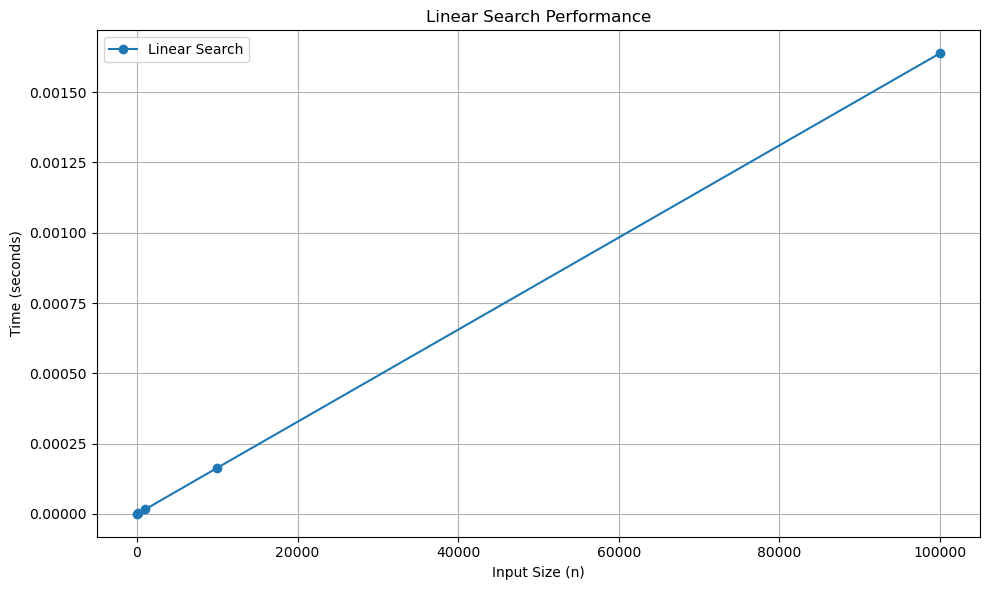

In [19]:
# Input sizes to test
n_values = [10, 100, 1000, 10000, 100000]  # Increased range

times = []

for n in n_values:
    arr = list(range(n))  # Create the array for each size
    target = n // 2  # A value that will be found (on average)
    time_taken = measure_time(linear_search, arr, target)
    times.append(time_taken)
    print(f"n = {n}, time = {time_taken}")  # Print intermediate results

# Plotting
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.plot(n_values, times, marker='o', linestyle='-', label='Linear Search')

# Optional: Plot a line representing O(n) for comparison
# You'll need to scale it appropriately to fit the graph
# Example:
# plt.plot(n_values, [x * times[0] / n_values[0] for x in n_values], linestyle='--', color='red', label='O(n)')

plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Linear Search Performance')
plt.grid(True)
plt.legend()

# Optional: Use logarithmic scale if needed (if the times vary greatly)
# plt.xscale('log')  # Use if n_values span several orders of magnitude
# plt.yscale('log')  # Use if times vary by orders of magnitude

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
